# Categorising data: supervised and unsupervised learning in Python

### Introduction:

Investigation of supervised classification and unsupervised clustering machine learning approaches to data catagorisation.
- Supervised **classification**, where all items in a data set are classified into two or more labelled categories. The number of categories and their labels are known in advance.
- Unsupervised **clustering**, where the data set is partitioned into a number of *clusters*, based on the similarity between items. The number of categories or labels are *not necessarily* known in advance.

<Figure size 640x480 with 0 Axes>

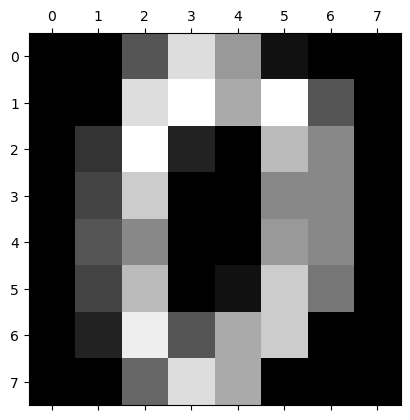

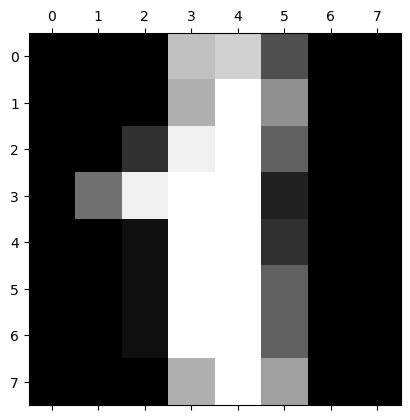

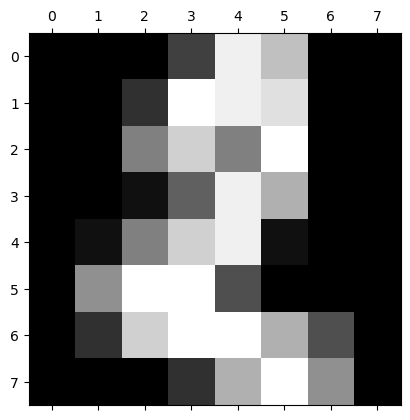

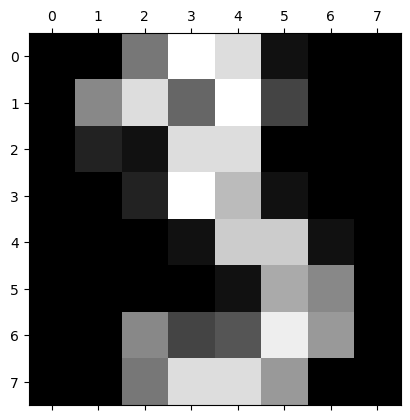

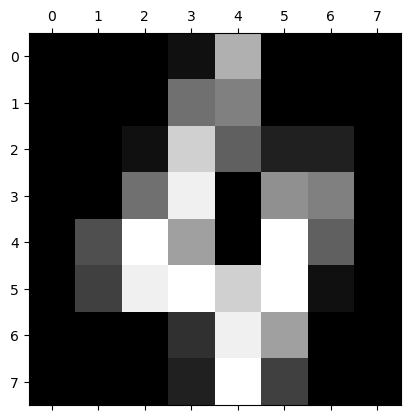

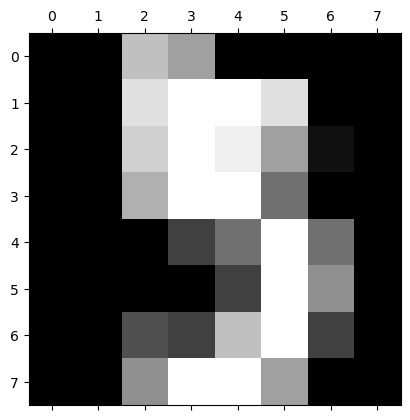

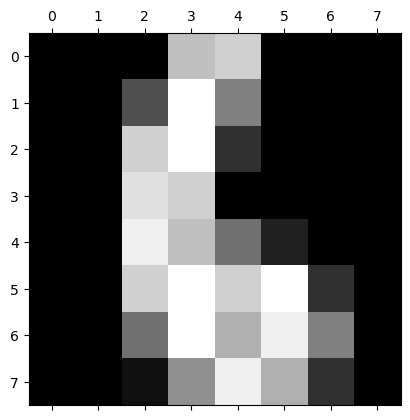

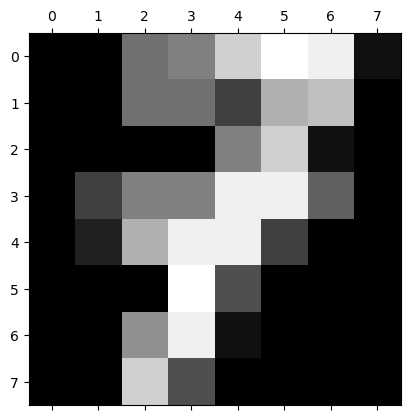

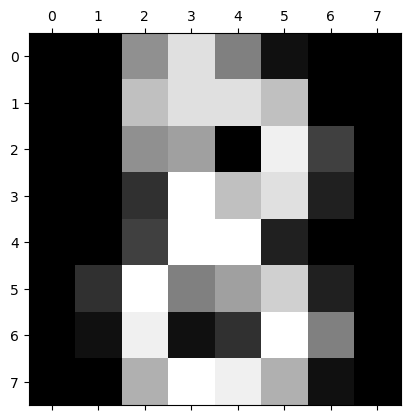

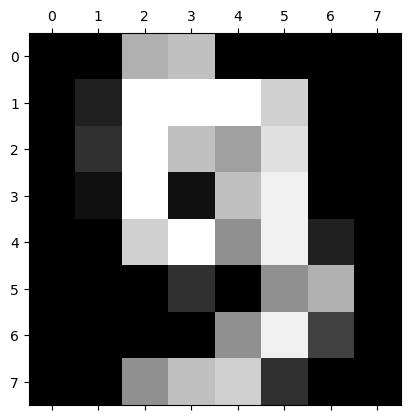

In [1]:
# Dataset: MNIST
from sklearn.datasets import load_digits
mnist = load_digits() # 1797 images

import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(mnist.images[i])
    plt.show()

## Unsupervised: Hierarchical Clustering

In [2]:
# plotting
import numpy as np
import matplotlib.pyplot as plt

def plot_clustering(embedding, y): # plot clustering
    x_min = np.min(embedding, axis = 0)
    x_max = np.max(embedding, axis = 0)
    plot_embedding = (embedding - x_min) / (x_max - x_min)
    
    plt.figure(figsize = (6, 4))
    for digit in y:
        plt.scatter(
            *embedding[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(clustering.labels_[y == digit] / 10),
            alpha=0.5,
        )
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# confusion matrix 
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sb
import pandas as pd

def confusion_matrix_visualisation(y, pred):
    cm = confusion_matrix(y, pred, normalize = 'true')
    fig, ax = plt.subplots(figsize = (10,8))
    sb.heatmap(cm, annot = True, cmap = 'OrRd', fmt = '.1%', ax = ax, vmin = 0, vmax = 1)
    ax.set_xlabel('prediction')
    ax.set_ylabel('label')

In [3]:
# align clusters with data values (NOTE NOT ALL VALUES ACCOUNTED FOR BY CLUSTERS)
from statistics import mode

def relabel_clusters(cluster_labels, y):
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    cluster_6 = []
    cluster_7 = []
    cluster_8 = []
    cluster_9 = []

    for i in range(len(cluster_labels)):
        if cluster_labels[i] == 0:
            cluster_0.append(i) # indices for cluster 0 values
        elif cluster_labels[i] == 1:
            cluster_1.append(i) # indices for cluster 1 values
        elif cluster_labels[i] == 2:
            cluster_2.append(i) # indices for cluster 2 values
        elif cluster_labels[i] == 3:
            cluster_3.append(i) # indices for cluster 3 values
        elif cluster_labels[i] == 4:
            cluster_4.append(i) # indices for cluster 4 values
        elif cluster_labels[i] == 5:
            cluster_5.append(i) # indices for cluster 5 values
        elif cluster_labels[i] == 6:
            cluster_6.append(i) # indices for cluster 6 values
        elif cluster_labels[i] == 7:
            cluster_7.append(i) # indices for cluster 7 values
        elif cluster_labels[i] == 8:
            cluster_8.append(i) # indices for cluster 8 values
        elif cluster_labels[i] == 9:
            cluster_9.append(i) # indices for cluster 9 values
    
    y_cluster_0 = []
    y_cluster_1 = []
    y_cluster_2 = []
    y_cluster_3 = []
    y_cluster_4 = []
    y_cluster_5 = []
    y_cluster_6 = []
    y_cluster_7 = []
    y_cluster_8 = []
    y_cluster_9 = []

    for i in range(len(cluster_0)):
        y_cluster_0.append(y[cluster_0[i]]) # find y values for cluster 0

    for i in range(len(cluster_1)):
        y_cluster_1.append(y[cluster_1[i]]) # find y values for cluster 1

    for i in range(len(cluster_2)):
        y_cluster_2.append(y[cluster_2[i]]) # find y values for cluster 2

    for i in range(len(cluster_3)):
        y_cluster_3.append(y[cluster_3[i]]) # find y values for cluster 3

    for i in range(len(cluster_4)):
        y_cluster_4.append(y[cluster_4[i]]) # find y values for cluster 4

    for i in range(len(cluster_5)):
        y_cluster_5.append(y[cluster_5[i]]) # find y values for cluster 5

    for i in range(len(cluster_6)):
        y_cluster_6.append(y[cluster_6[i]]) # find y values for cluster 6

    for i in range(len(cluster_7)):
        y_cluster_7.append(y[cluster_7[i]]) # find y values for cluster 7

    for i in range(len(cluster_8)):
        y_cluster_8.append(y[cluster_8[i]]) # find y values for cluster 8

    for i in range(len(cluster_9)):
        y_cluster_9.append(y[cluster_9[i]]) # find y values for cluster 9

    y_cluster_modes = [mode(y_cluster_0), mode(y_cluster_1), mode(y_cluster_2), mode(y_cluster_3), mode(y_cluster_4), mode(y_cluster_5), mode(y_cluster_6), mode(y_cluster_7), mode(y_cluster_8), mode(y_cluster_9)]

    pred = []

    for i in range(len(cluster_labels)):
        pred.append(y_cluster_modes[cluster_labels[i]])
    return(pred, y_cluster_modes)

In [4]:
# data set up
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import load_digits
mnist = load_digits() # 1797 images

x, y = mnist.data, mnist.target # x contains image data, y contains image labels
n_samples, n_features = x.shape # number of samples: images in set; number of features: pixels in image

np.random.seed(0)

embedding = manifold.SpectralEmbedding(n_components = 2).fit_transform(x)

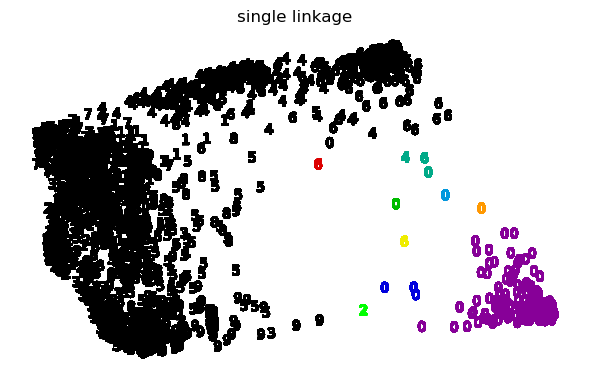

Accuracy Score: 0.2020033388981636
Clusters found: [0, 0, 0, 0, 0, 2, 3, 6, 6, 6]


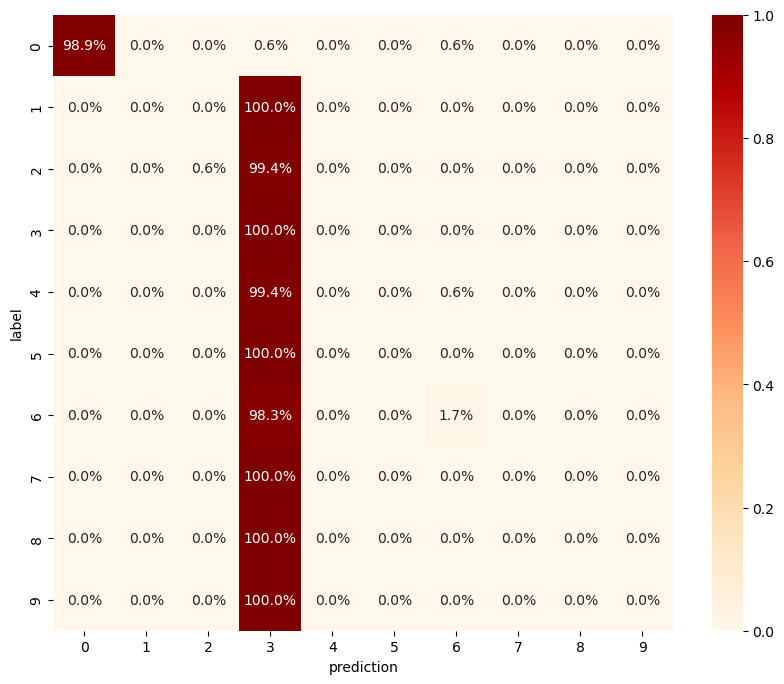

In [5]:
# single linkage - min distances between all observations 
clustering = AgglomerativeClustering(linkage = 'single', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('single linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

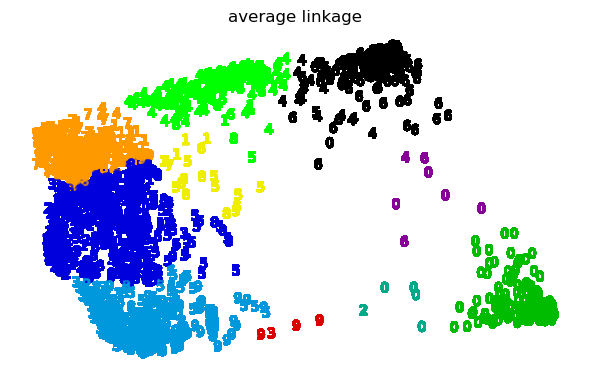

Accuracy Score: 0.5564830272676683
Clusters found: [0, 0, 0, 2, 3, 4, 5, 6, 7, 9]


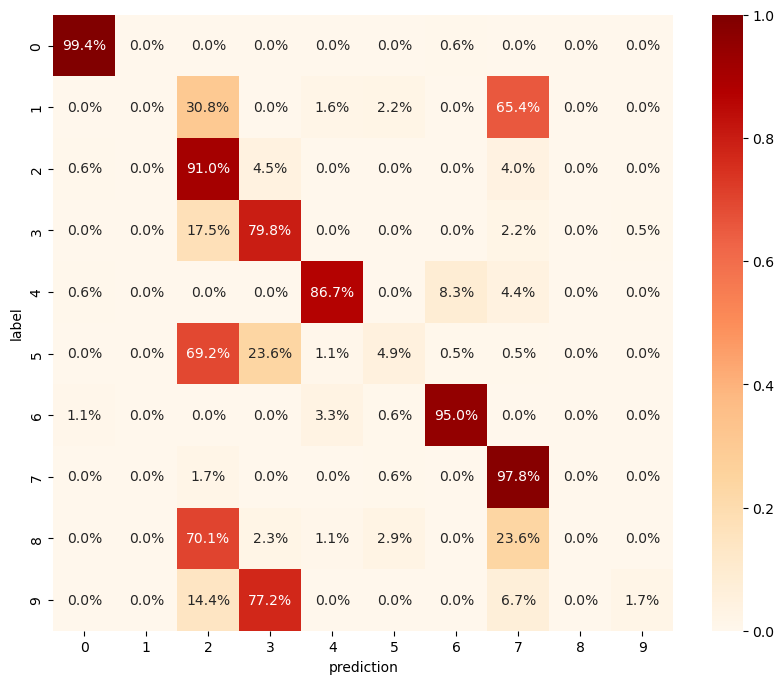

In [6]:
# average linkage - average distance of each observation
clustering = AgglomerativeClustering(linkage = 'average', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('average linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

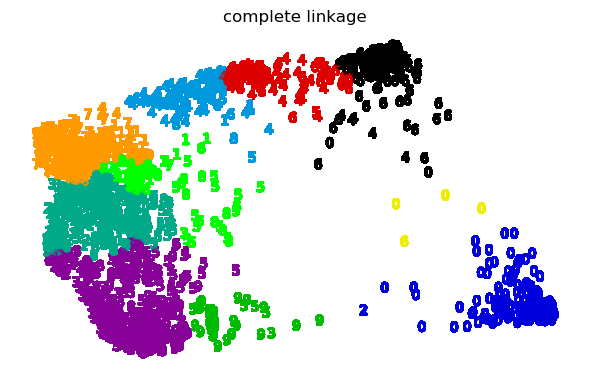

Accuracy Score: 0.5581524763494713
Clusters found: [0, 0, 2, 3, 4, 4, 6, 7, 8, 9]


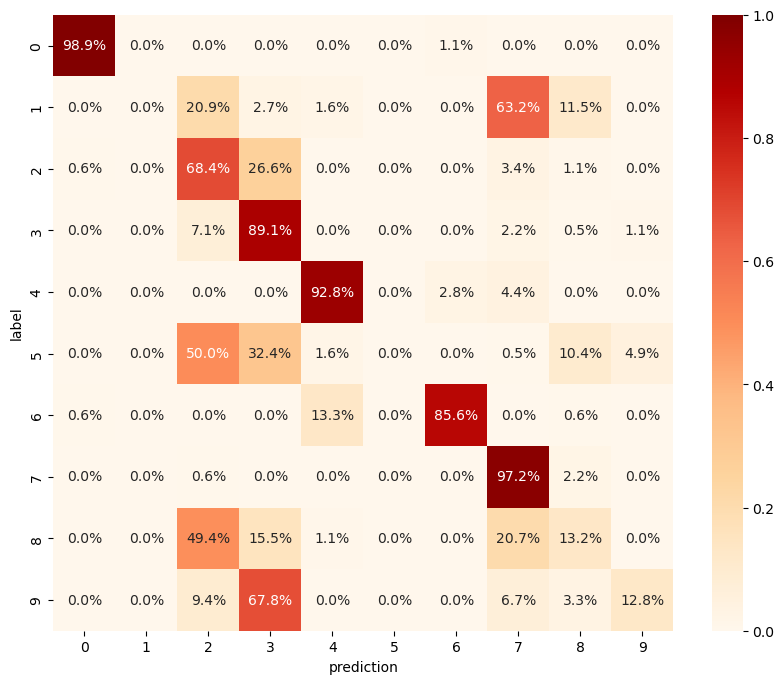

In [7]:
# complete linkage - max distances between all observations
clustering = AgglomerativeClustering(linkage = 'complete', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('complete linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

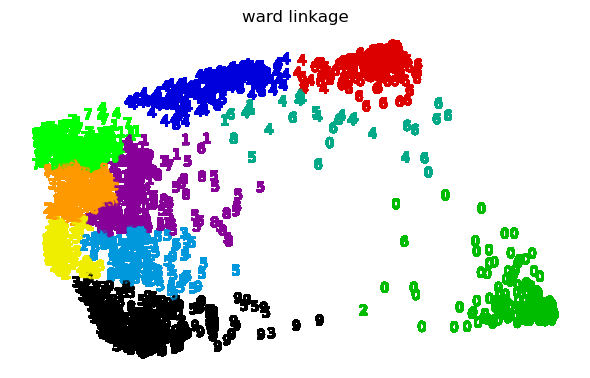

Accuracy Score: 0.6316082359488036
Clusters found: [0, 2, 3, 4, 4, 5, 5, 6, 7, 8]


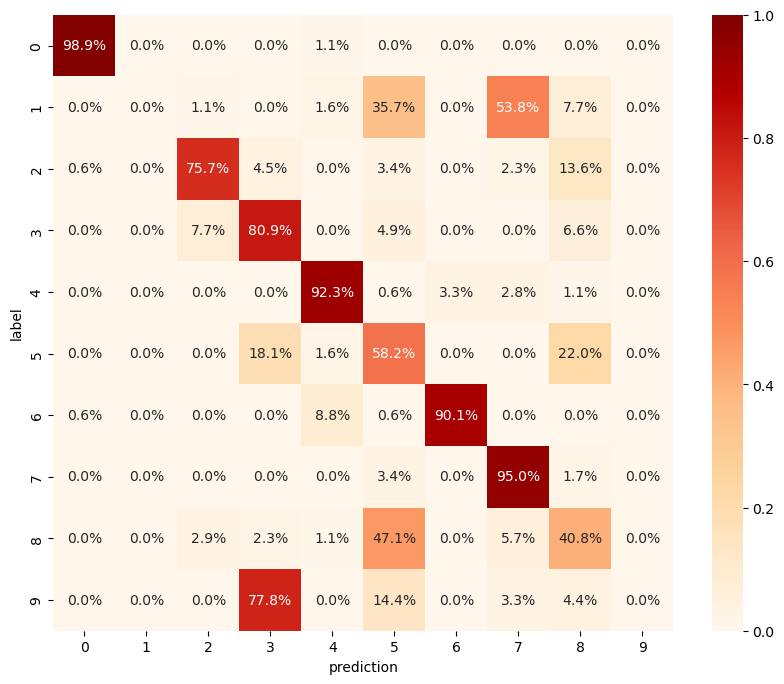

In [8]:
# ward linkage - min variance in clusters being merged
clustering = AgglomerativeClustering(linkage = 'ward', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('ward linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

## Unsupervised: K-means Clustering

## Supervised: k-NN

In [1]:
#importing necessary packages
import seaborn as sn 
import matplotlib.pyplot as plt
#importing dataset
from sklearn.datasets import load_digits
mnist = load_digits() 

In [2]:
#Displaying data set to facilitate understanding
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
#Assigning components of the dataset as either the response or explanatory components
x = mnist.data
y = mnist.target 
x,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

# Brief Data Visualisation

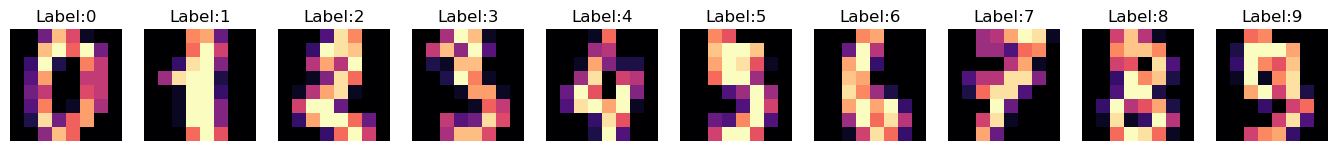

In [4]:
im = mnist.images
fig, axes = plt.subplots(1, 10, figsize=(17, 17))

#Plotting a section of the dataset in the form of 10 subplots

for i, ax in enumerate(axes):
    ax.imshow(im[i], cmap=plt.cm.magma)
    ax.set_title(f"Label:{y[i]}")
    ax.axis("off")

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into 75% training, 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 1, shuffle = True)

# k-NN Classifier

## Weights = Uniform

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train) #Fitting the algorithm to the training dataset

KNeighborsClassifier(n_neighbors=10)

## Accuracy Evaluation 

In [7]:
knn.score(x_test, y_test) #Evaluating the how accurate the algorithm was in matching test data to labels

0.9933333333333333

In [8]:
from sklearn.metrics import confusion_matrix
y_pred1 = knn.predict(x_test)
cm1 = confusion_matrix(y_test,y_pred1) #Comparing predicted values to actual using the confusion matrix.

Text(95.72222222222221, 0.5, 'Actual')

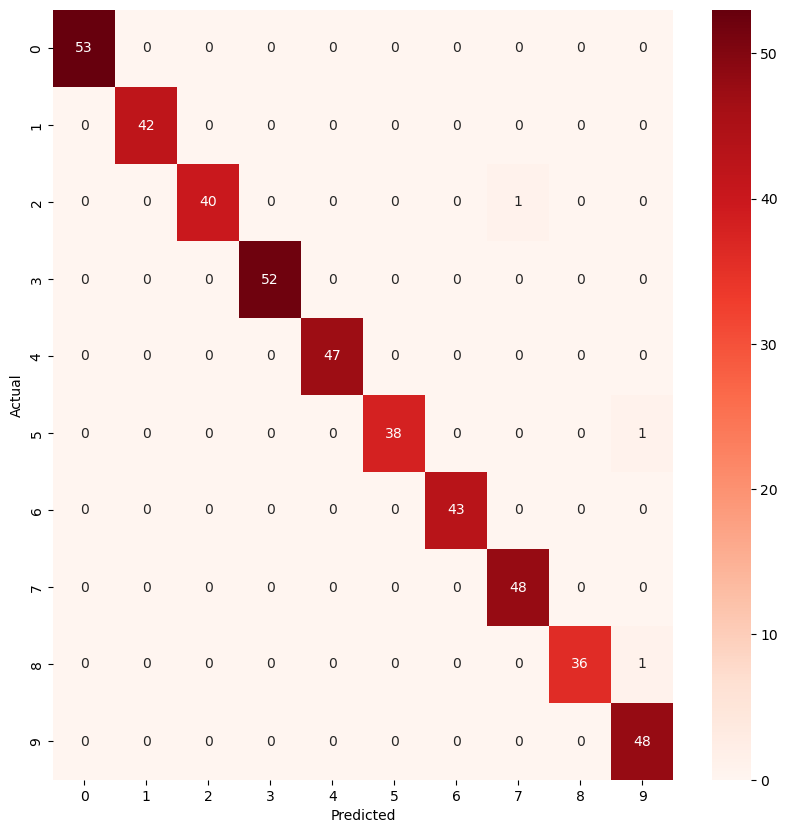

In [9]:
plt.figure(figsize = (10,10))
sn.heatmap(cm1, annot = True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual') #Visualizing the confusion matrix

## Weights = Distance

In [10]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Accuracy Evaluation 

In [11]:
knn.score(x_test, y_test)

0.9911111111111112

In [12]:
y_pred2 = knn.predict(x_test)
cm2 = confusion_matrix(y_test,y_pred2)

Text(95.72222222222221, 0.5, 'Actual')

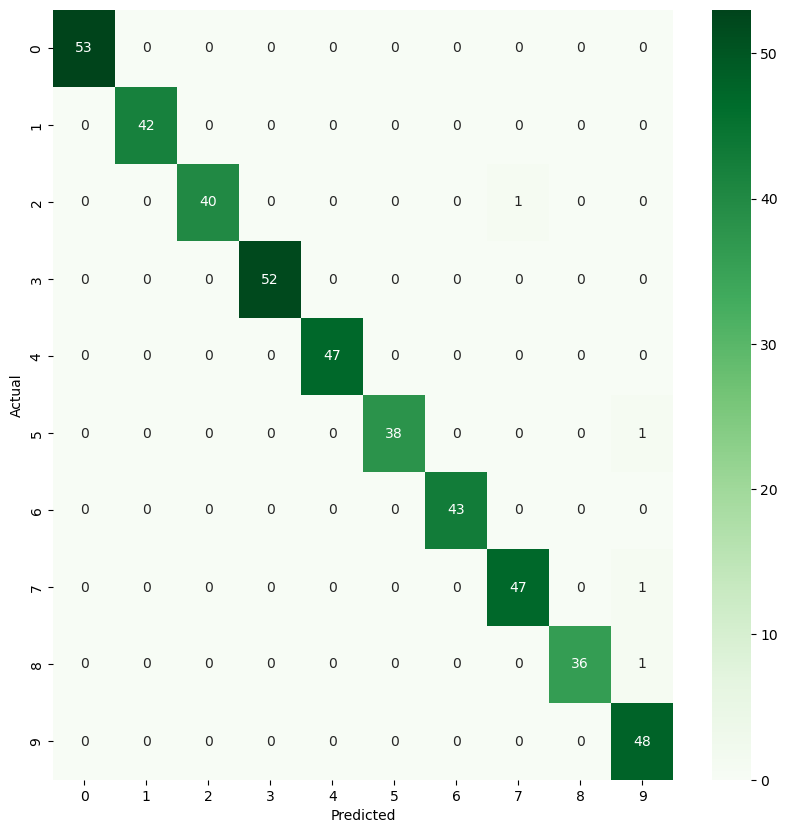

In [13]:
plt.figure(figsize = (10,10))
sn.heatmap(cm2, annot = True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Algorithm vrs. Accuracy?

The accuracy of k-NN was not affected in anyway by the choice of algorithm used to compute the nearest neighbors as a change from ball tree, to KD tree to Brute had no significant effect on the accuracy result.

Choice of n_neighbours vrs. Accuracy?

It is also worth mentioning that in a bid to find the number of neighbours that will yield that highest accuracy, it was observed that the value '10' and its immediate surrounding numbers were the only to yield such a high accuracy, anything too high or too low reduced the accuracy of the algorithm drastically.

## Supervised: FCNN

In [9]:
'''
Utils
'''

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
import torch
import time

def set_seed_torch(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    # tf.random.set_seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
def MAPE(pred, act):
    '''
    returns mean absolute percentage error for each pytorch batch
    '''
    return 100/torch.numel(act) * torch.sum(torch.abs((act-pred)/act))

def samplewise_MAPE(pred, act):
    '''
    returns mean absolute percentage error for each sample
    '''
    return 100/act.shape[1] * np.sum(np.abs((act-pred)/act), axis=1)

def torch_samplewise_MAPE(pred, act):
    '''
    returns mean absolute percentage error for each sample
    '''
    return 100/act.size()[1] * torch.sum(torch.abs((act-pred)/act), axis=1)

def samplewise_MSE(act, pred):
    '''
    returns mean squared error for each sample
    '''
    return np.sum((act-pred)**2, axis=1)/act.shape[1]

def samplewise_MAE(pred, act):
    '''
    returns mean absolute error for each sample
    '''
    return 1/act.shape[1] * np.sum(np.abs(act-pred), axis=1)

def speed_test(model, dim, num_test=1e5, precision='full', device='cuda'):
    test_tensor = torch.randn(int(num_test), int(dim))
    
    if device == 'cuda':
        model.to(device)
        test_tensor = test_tensor.to(device)
        
    if precision == 'half':
        model.half()
        test_tensor = test_tensor.half()
        
    t0 = time.time()
    model(test_tensor)
    dt = time.time() - t0
    
    print(f'Speed test run on {num_test:0.2e} samples,\nTook {dt} seconds in total, {dt/num_test:0.4e} seconds per sample')
    return dt

In [10]:
'''
Dataset
'''


import torch

import pandas as pd
import numpy as np

# build a dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y, channel_size=None):
        '''
        prepare dataset for NN training, x and y can be either pd.DataFrames or np.array
        
        channel_size: If not None, y will be shaped into a 2D array with shape (channel, channel_size)
            If None, y will be a 1D array
        '''
        if isinstance(x, pd.DataFrame):
            self.x = x.to_numpy().astype(np.float32)
            self.x_headings = x.columns.values # saves the headings for referencing
            self.len = len(x.index)
        else:
            self.x = x.astype(np.float32)
            self.x_headings = None 
            self.len = len(x)
            
        if isinstance(y, pd.DataFrame):
            self.y = y.to_numpy().astype(np.float32)
            self.y_headings = y.columns.values
        else:
            self.y = y.astype(np.float32)
            self.y_headings = None
        
        assert len(self.x) == len(self.y)


    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    # check the dtype of the dataset for pytorch training
    def check_dtype(self):
        if self.x.dtype != np.float32:
            print(f'Detected {self.x.dtype} in dataset.x, converting it to np.float32')
            self.x = self.x.astype(np.float32)
        if self.y.dtype != np.float32:
            print(f'Detected {self.y.dtype} in dataset.y, converting it to np.float32')
            self.y = self.y.astype(np.float32)

def to_dense(sparse):
    dense = np.zeros([len(sparse), np.max(sparse)+1])
    for idx, i in enumerate(sparse):
        dense[idx, i] = 1
    return dense

In [11]:
'''
Model
'''


from torch import nn
import torch
import copy

import numpy as np

def model_summary(model):
    '''
    prints a summery of the model, mainly for debugging uses
    '''
    print(next(model.named_modules())[1])
    
    param_size = 0
    trainable_param_size = 0
    for name, param in model.named_parameters():
        nparam = param.nelement()
        print(f'{name}, {nparam}, trainable: {param.requires_grad}')
        param_size += nparam
        if param.requires_grad:
            trainable_param_size += nparam
    print(f'Total parameter = {param_size}')
    print(f'Total trainable parameter = {trainable_param_size}\n')
    # time.sleep(1)

def initialise_weights(layers, a, nonlinearity='leaky_relu'):
    '''
    Initialise weights for dense layers
    '''
    for layer in layers[:-1]: # skip the last layer, which is either Lrelu or nn.Linear linking the output layer
        if isinstance(layer, nn.Linear):
            nn.init.kaiming_normal_(layer.weight, a=a, nonlinearity=nonlinearity)
        
        
class FCNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, 
                 alpha=0.3, 
                 dropout=None, dropout_on_last_layer=False,
                 ):
        '''
        fully connected neural net
        
        branching: the nth last layer at which the network splits in half
        alpha: sets the negative gradient for the leakyrelu activation
        dropout: None or float or list of float for nn.Dropout
        dropout_on_last_layer: whether to add Dropout right before the output
        activation_on_last_layer: whether to add nonlinear activation right before the output layer
        '''
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        
        hdim = np.array([input_dim]+hidden_dim)
        
        if isinstance(dropout, float):
            dropout = [dropout]*len(hdim)
        
        # assert len(dropout) == len(hdim)
        
        hidden_layers=[]
        for i in range(len(hidden_dim)):
            layer = []
            layer.append(nn.Linear(hdim[i], hdim[i+1]))
            layer.append(nn.LeakyReLU(negative_slope=alpha))
            if dropout is not None:
                layer.append(nn.Dropout(dropout[i]))
            hidden_layers.append(layer)
            
        if not dropout_on_last_layer and dropout is not None:
            del hidden_layers[-1][2]
            
        self.layers = nn.Sequential(*sum(hidden_layers, []),
                                    nn.Linear(hdim[-1], output_dim),
                                    nn.Sigmoid(),
                                    )

        initialise_weights(self.layers, a=alpha, nonlinearity='leaky_relu')
        
    def forward(self, x):
        h = self.layers(x)
        return h
        
class one_layer_model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.layer(x)

In [12]:
'''
Trainer
'''

from torch.utils.data.dataloader import DataLoader
from torch.optim.lr_scheduler import LinearLR, ExponentialLR, ReduceLROnPlateau
from torch.optim import NAdam
import torch

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import time
import gc
    
    
class Trainer:
    def __init__(self, model, config, train_set, val_set, test_set=None):
        self.model = model
        self.train_set = train_set
        self.val_set = val_set
        self.test_set = test_set
        self.config = config
        
        if self.test_set is None:
            self.test_set = self.val_set
        
        if config.device=='gpu' and torch.cuda.is_available(): # take over whatever gpus are on the system
            self.device = torch.cuda.current_device()
            self.model.to(self.device)
            print('using f{self.device}')
        else:
            self.device = 'cpu'
            print('using CPU')
            
        self.opt = NAdam(self.model.parameters(), 
                         lr=config.ini_lr, 
                         betas=config.betas, 
                         eps=config.eps,
                         weight_decay=config.weight_decay,
                         )
        
        model_summary(self.model)
        print('model loaded in cuda:', next(self.model.parameters()).is_cuda)
        
    def train(self):
        model, optimizer, config = self.model, self.opt, self.config
        loss_function = torch.nn.CrossEntropyLoss()
        # scheduler = ExponentialLR(optimizer, 
        #                           gamma=config.gamma,
        #                           )
        # scheduler = LinearLR(optimizer, 
        #                       start_factor=1., 
        #                       end_factor=config.fin_lr/config.ini_lr,
        #                       total_iters=config.max_epochs,
        #                      )
        scheduler = ReduceLROnPlateau(optimizer, 
                                      factor=0.5, 
                                      patience=20,
                                      min_lr=1e-6,
                                      verbose=True
                                      )
        
        loader = DataLoader(self.train_set, shuffle=True, pin_memory=True,
                            batch_size=config.batch_size,
                            num_workers=config.num_workers)
        
        print(vars(config))
        
        lrs, train_losses, val_losses = [], [], []
        
        for epoch in range(config.max_epochs):
            t0 = time.time()
            
            if self.config.progress_bar:
                # set up a progress bar
                pbar = tqdm(enumerate(loader), 
                            total=len(loader), 
                            # bar_format='{l_bar}{bar:10}{r_bar}{bar:-10b}',
                            unit="batch",
                            )
            else:
                pbar = enumerate(loader)
            
            sum_loss = 0.
            sum_err = 0.
            for it, (x, y) in pbar:
                x, y = x.to(self.device), y.to(self.device)
                
                model.train()
                optimizer.zero_grad()
                pred = model(x)
                loss = loss_function(pred, y)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.grad_norm_clip)
                optimizer.step()
                
                sum_loss += loss.item()
                
                train_out = torch.argmax(pred, axis=1) == torch.argmax(y, axis=1)
                train_acc = train_out.sum() / pred.size()[0]
                
                # lr = scheduler.get_last_lr()[0]
                lr = optimizer.param_groups[0]['lr']
                
                if self.config.progress_bar:
                    pbar.set_description(f'epoch {epoch+1} iter {it}: lr {lr:.4e} loss {loss.item():.4e} batch train_acc {train_acc.item():.4f}')
                
            # validation
            model.eval()
            with torch.no_grad():
                val_x = torch.tensor(self.val_set.x).to(self.device)
                val_y = torch.tensor(self.val_set.y).to(self.device)
                val_pred = model(val_x)
                val_loss = loss_function(val_pred, val_y)
                
                pred_out = torch.argmax(val_pred, axis=1) == torch.argmax(val_y, axis=1)
                pred_acc = pred_out.sum() / val_pred.size()[0]
                
            lrs.append(lr)
            train_losses.append(sum_loss/len(loader))
            val_losses.append(val_loss.item())
            
            print(f'End of epoch {epoch+1}: {time.time()-t0:4f}s lr {lr:.4e} train_loss {train_losses[-1]:.4e} train_acc {train_acc.item():.4f} val_loss {val_losses[-1]:.4e} pred_acc {pred_acc:.4f}')
            
            # update lr scheduler
            scheduler.step(val_loss.item())
            
            # save model
            if (config.epoch_save_freq > 0 and epoch > config.max_epochs-500 and epoch % config.epoch_save_freq == 0) \
                or (epoch == config.max_epochs - 1):
                torch.save(model, 
                           config.epoch_save_name+str(epoch+1)+'.pth' # f'_{self.avg_loss:.2f}.pth'
                           )
        
            gc.collect()
            
        print('training finished')
        
        return {'loss': train_losses, 'val_loss': val_losses}
    
    
    def test(self):
        if self.test_set is None:
            print('No allocated test_set')
            return None
        
        test_x = torch.tensor(self.test_set.x).to(self.device)
        test_y = torch.tensor(self.test_set.y).to(self.device)
        loss_function = torch.nn.MSELoss()
        
        self.model.eval()
        with torch.no_grad():
            test_pred = self.model(test_x)
            loss = loss_function(test_pred, test_y)
            test_err = MAPE(test_pred, test_y)
            test_err_np = test_err.cpu().numpy()
            
        pred = np.argmax(test_pred.cpu().numpy(), axis=1)
        label = np.argmax(self.test_set.y, axis=1)
        
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        import pandas as pd
        
        cm = confusion_matrix(label, pred, normalize='true')
        fig, ax = plt.subplots(figsize=(6,6)) 
        df_cm = pd.DataFrame(cm, index = [i for i in np.arange(10)],
                      columns = [i for i in np.arange(10)])
        sn.heatmap(df_cm, annot=True, cmap="OrRd", fmt=".1%", ax=ax, vmin=0., vmax=1.)
        # ax.invert_yaxis()
        ax.set_xlabel('prediction')
        ax.set_ylabel('label')
        fig.show()
        
        return {'loss': loss, 'err': test_err}
        


using CPU
FCNN(
  (layers): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): LeakyReLU(negative_slope=0.3)
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): Sigmoid()
  )
)
layers.0.weight, 1280, trainable: True
layers.0.bias, 20, trainable: True
layers.2.weight, 200, trainable: True
layers.2.bias, 10, trainable: True
Total parameter = 1510
Total trainable parameter = 1510

model loaded in cuda: False
{'__module__': '__main__', 'device': 'cpu', 'max_epochs': 1000, 'batch_size': 1000, 'ini_lr': 0.0005, 'fin_lr': 1e-06, 'gamma': 0.996, 'decayfactor': 0.5, 'betas': (0.9, 0.99), 'eps': 1e-08, 'grad_norm_clip': 1.0, 'weight_decay': 1e-10, 'epoch_save_freq': 0, 'epoch_save_name': './FCNN_', 'num_workers': 0, 'progress_bar': False, 'model_shape': [20], 'dropout': None, 'dropout_on_last_layer': False, '__dict__': <attribute '__dict__' of 'TrainerConfig' objects>, '__weakref__': <attribute '__weakref__' of 'TrainerConfig' objects>, '__doc__': N

End of epoch 67: 0.007818s lr 5.0000e-04 train_loss 1.9311e+00 train_acc 0.2218 val_loss 1.9444e+00 pred_acc 0.2559
End of epoch 68: 0.008282s lr 5.0000e-04 train_loss 1.9226e+00 train_acc 0.2724 val_loss 1.9386e+00 pred_acc 0.2656
End of epoch 69: 0.007938s lr 5.0000e-04 train_loss 1.9119e+00 train_acc 0.2218 val_loss 1.9335e+00 pred_acc 0.2719
End of epoch 70: 0.009599s lr 5.0000e-04 train_loss 1.9087e+00 train_acc 0.3191 val_loss 1.9281e+00 pred_acc 0.2865
End of epoch 71: 0.008141s lr 5.0000e-04 train_loss 1.8915e+00 train_acc 0.3074 val_loss 1.9218e+00 pred_acc 0.2935
End of epoch 72: 0.006650s lr 5.0000e-04 train_loss 1.8873e+00 train_acc 0.3385 val_loss 1.9158e+00 pred_acc 0.3102
End of epoch 73: 0.007861s lr 5.0000e-04 train_loss 1.8958e+00 train_acc 0.3074 val_loss 1.9093e+00 pred_acc 0.3192
End of epoch 74: 0.007035s lr 5.0000e-04 train_loss 1.8856e+00 train_acc 0.3307 val_loss 1.9031e+00 pred_acc 0.3359
End of epoch 75: 0.011168s lr 5.0000e-04 train_loss 1.8806e+00 train_acc

End of epoch 140: 0.009751s lr 5.0000e-04 train_loss 1.6920e+00 train_acc 0.7354 val_loss 1.7213e+00 pred_acc 0.6905
End of epoch 141: 0.011178s lr 5.0000e-04 train_loss 1.6897e+00 train_acc 0.7082 val_loss 1.7210e+00 pred_acc 0.6954
End of epoch 142: 0.008287s lr 5.0000e-04 train_loss 1.7005e+00 train_acc 0.6654 val_loss 1.7190e+00 pred_acc 0.6926
End of epoch 143: 0.011495s lr 5.0000e-04 train_loss 1.6982e+00 train_acc 0.6965 val_loss 1.7185e+00 pred_acc 0.6940
End of epoch 144: 0.010057s lr 5.0000e-04 train_loss 1.6839e+00 train_acc 0.7082 val_loss 1.7175e+00 pred_acc 0.6961
End of epoch 145: 0.009248s lr 5.0000e-04 train_loss 1.6948e+00 train_acc 0.7237 val_loss 1.7163e+00 pred_acc 0.6961
End of epoch 146: 0.007417s lr 5.0000e-04 train_loss 1.6819e+00 train_acc 0.7354 val_loss 1.7149e+00 pred_acc 0.6975
End of epoch 147: 0.010587s lr 5.0000e-04 train_loss 1.6757e+00 train_acc 0.7276 val_loss 1.7138e+00 pred_acc 0.6989
End of epoch 148: 0.008255s lr 5.0000e-04 train_loss 1.6791e+00 

End of epoch 213: 0.007484s lr 5.0000e-04 train_loss 1.6037e+00 train_acc 0.8677 val_loss 1.6381e+00 pred_acc 0.8449
End of epoch 214: 0.006811s lr 5.0000e-04 train_loss 1.6025e+00 train_acc 0.8716 val_loss 1.6378e+00 pred_acc 0.8491
End of epoch 215: 0.007484s lr 5.0000e-04 train_loss 1.6060e+00 train_acc 0.8677 val_loss 1.6359e+00 pred_acc 0.8491
End of epoch 216: 0.007629s lr 5.0000e-04 train_loss 1.5962e+00 train_acc 0.8988 val_loss 1.6349e+00 pred_acc 0.8519
End of epoch 217: 0.009588s lr 5.0000e-04 train_loss 1.5997e+00 train_acc 0.8638 val_loss 1.6340e+00 pred_acc 0.8526
End of epoch 218: 0.008479s lr 5.0000e-04 train_loss 1.5958e+00 train_acc 0.8949 val_loss 1.6329e+00 pred_acc 0.8547
End of epoch 219: 0.011155s lr 5.0000e-04 train_loss 1.5928e+00 train_acc 0.9144 val_loss 1.6320e+00 pred_acc 0.8561
End of epoch 220: 0.010100s lr 5.0000e-04 train_loss 1.5918e+00 train_acc 0.9144 val_loss 1.6310e+00 pred_acc 0.8567
End of epoch 221: 0.007456s lr 5.0000e-04 train_loss 1.5987e+00 

End of epoch 285: 0.009497s lr 5.0000e-04 train_loss 1.5339e+00 train_acc 0.9728 val_loss 1.5624e+00 pred_acc 0.9318
End of epoch 286: 0.006775s lr 5.0000e-04 train_loss 1.5330e+00 train_acc 0.9650 val_loss 1.5613e+00 pred_acc 0.9325
End of epoch 287: 0.008229s lr 5.0000e-04 train_loss 1.5342e+00 train_acc 0.9650 val_loss 1.5606e+00 pred_acc 0.9332
End of epoch 288: 0.010117s lr 5.0000e-04 train_loss 1.5322e+00 train_acc 0.9650 val_loss 1.5603e+00 pred_acc 0.9332
End of epoch 289: 0.007003s lr 5.0000e-04 train_loss 1.5363e+00 train_acc 0.9494 val_loss 1.5594e+00 pred_acc 0.9346
End of epoch 290: 0.006643s lr 5.0000e-04 train_loss 1.5283e+00 train_acc 0.9689 val_loss 1.5590e+00 pred_acc 0.9346
End of epoch 291: 0.007152s lr 5.0000e-04 train_loss 1.5338e+00 train_acc 0.9611 val_loss 1.5588e+00 pred_acc 0.9339
End of epoch 292: 0.006871s lr 5.0000e-04 train_loss 1.5246e+00 train_acc 0.9689 val_loss 1.5587e+00 pred_acc 0.9374
End of epoch 293: 0.007964s lr 5.0000e-04 train_loss 1.5236e+00 

End of epoch 357: 0.008023s lr 5.0000e-04 train_loss 1.5094e+00 train_acc 0.9805 val_loss 1.5364e+00 pred_acc 0.9499
End of epoch 358: 0.007891s lr 5.0000e-04 train_loss 1.5042e+00 train_acc 0.9922 val_loss 1.5364e+00 pred_acc 0.9499
End of epoch 359: 0.007060s lr 5.0000e-04 train_loss 1.5072e+00 train_acc 0.9767 val_loss 1.5358e+00 pred_acc 0.9471
End of epoch 360: 0.006907s lr 5.0000e-04 train_loss 1.5062e+00 train_acc 0.9883 val_loss 1.5359e+00 pred_acc 0.9471
End of epoch 361: 0.007952s lr 5.0000e-04 train_loss 1.5078e+00 train_acc 0.9767 val_loss 1.5355e+00 pred_acc 0.9492
End of epoch 362: 0.008179s lr 5.0000e-04 train_loss 1.5129e+00 train_acc 0.9650 val_loss 1.5355e+00 pred_acc 0.9471
End of epoch 363: 0.010910s lr 5.0000e-04 train_loss 1.5083e+00 train_acc 0.9728 val_loss 1.5352e+00 pred_acc 0.9471
End of epoch 364: 0.007775s lr 5.0000e-04 train_loss 1.5078e+00 train_acc 0.9805 val_loss 1.5348e+00 pred_acc 0.9492
End of epoch 365: 0.009052s lr 5.0000e-04 train_loss 1.5088e+00 

End of epoch 429: 0.007382s lr 5.0000e-04 train_loss 1.4962e+00 train_acc 0.9883 val_loss 1.5246e+00 pred_acc 0.9576
End of epoch 430: 0.008825s lr 5.0000e-04 train_loss 1.4997e+00 train_acc 0.9767 val_loss 1.5248e+00 pred_acc 0.9569
End of epoch 431: 0.007150s lr 5.0000e-04 train_loss 1.4965e+00 train_acc 0.9728 val_loss 1.5245e+00 pred_acc 0.9562
End of epoch 432: 0.008524s lr 5.0000e-04 train_loss 1.4956e+00 train_acc 0.9805 val_loss 1.5247e+00 pred_acc 0.9569
End of epoch 433: 0.008084s lr 5.0000e-04 train_loss 1.4983e+00 train_acc 0.9767 val_loss 1.5247e+00 pred_acc 0.9555
End of epoch 434: 0.007156s lr 5.0000e-04 train_loss 1.4976e+00 train_acc 0.9805 val_loss 1.5248e+00 pred_acc 0.9555
End of epoch 435: 0.007191s lr 5.0000e-04 train_loss 1.4984e+00 train_acc 0.9689 val_loss 1.5240e+00 pred_acc 0.9562
End of epoch 436: 0.007550s lr 5.0000e-04 train_loss 1.4936e+00 train_acc 0.9767 val_loss 1.5242e+00 pred_acc 0.9576
End of epoch 437: 0.008975s lr 5.0000e-04 train_loss 1.4971e+00 

End of epoch 501: 0.007228s lr 5.0000e-04 train_loss 1.4901e+00 train_acc 0.9767 val_loss 1.5185e+00 pred_acc 0.9611
End of epoch 502: 0.006999s lr 5.0000e-04 train_loss 1.4894e+00 train_acc 0.9922 val_loss 1.5182e+00 pred_acc 0.9611
End of epoch 503: 0.007128s lr 5.0000e-04 train_loss 1.4901e+00 train_acc 0.9883 val_loss 1.5180e+00 pred_acc 0.9611
End of epoch 504: 0.006819s lr 5.0000e-04 train_loss 1.4913e+00 train_acc 0.9922 val_loss 1.5185e+00 pred_acc 0.9597
End of epoch 505: 0.007173s lr 5.0000e-04 train_loss 1.4891e+00 train_acc 0.9844 val_loss 1.5183e+00 pred_acc 0.9597
End of epoch 506: 0.006654s lr 5.0000e-04 train_loss 1.4905e+00 train_acc 0.9805 val_loss 1.5179e+00 pred_acc 0.9590
End of epoch 507: 0.008369s lr 5.0000e-04 train_loss 1.4896e+00 train_acc 0.9844 val_loss 1.5176e+00 pred_acc 0.9611
End of epoch 508: 0.007261s lr 5.0000e-04 train_loss 1.4888e+00 train_acc 0.9883 val_loss 1.5179e+00 pred_acc 0.9590
End of epoch 509: 0.008648s lr 5.0000e-04 train_loss 1.4899e+00 

End of epoch 573: 0.011561s lr 5.0000e-04 train_loss 1.4905e+00 train_acc 0.9767 val_loss 1.5144e+00 pred_acc 0.9631
End of epoch 574: 0.007866s lr 5.0000e-04 train_loss 1.4840e+00 train_acc 0.9961 val_loss 1.5149e+00 pred_acc 0.9611
End of epoch 575: 0.008097s lr 5.0000e-04 train_loss 1.4872e+00 train_acc 0.9767 val_loss 1.5147e+00 pred_acc 0.9624
End of epoch 576: 0.007221s lr 5.0000e-04 train_loss 1.4828e+00 train_acc 1.0000 val_loss 1.5148e+00 pred_acc 0.9631
End of epoch 577: 0.007457s lr 5.0000e-04 train_loss 1.4847e+00 train_acc 0.9844 val_loss 1.5146e+00 pred_acc 0.9624
End of epoch 578: 0.007843s lr 5.0000e-04 train_loss 1.4859e+00 train_acc 0.9767 val_loss 1.5145e+00 pred_acc 0.9631
End of epoch 579: 0.009029s lr 5.0000e-04 train_loss 1.4861e+00 train_acc 0.9767 val_loss 1.5143e+00 pred_acc 0.9631
End of epoch 580: 0.008224s lr 5.0000e-04 train_loss 1.4833e+00 train_acc 0.9922 val_loss 1.5140e+00 pred_acc 0.9638
End of epoch 581: 0.008794s lr 5.0000e-04 train_loss 1.4871e+00 

End of epoch 645: 0.007106s lr 5.0000e-04 train_loss 1.4831e+00 train_acc 0.9805 val_loss 1.5125e+00 pred_acc 0.9645
End of epoch 646: 0.007915s lr 5.0000e-04 train_loss 1.4858e+00 train_acc 0.9805 val_loss 1.5119e+00 pred_acc 0.9645
End of epoch 647: 0.008009s lr 5.0000e-04 train_loss 1.4813e+00 train_acc 0.9883 val_loss 1.5123e+00 pred_acc 0.9652
End of epoch 648: 0.006824s lr 5.0000e-04 train_loss 1.4836e+00 train_acc 0.9922 val_loss 1.5119e+00 pred_acc 0.9666
End of epoch 649: 0.013901s lr 5.0000e-04 train_loss 1.4823e+00 train_acc 0.9883 val_loss 1.5118e+00 pred_acc 0.9666
End of epoch 650: 0.006760s lr 5.0000e-04 train_loss 1.4819e+00 train_acc 0.9844 val_loss 1.5118e+00 pred_acc 0.9652
End of epoch 651: 0.008792s lr 5.0000e-04 train_loss 1.4862e+00 train_acc 0.9805 val_loss 1.5119e+00 pred_acc 0.9638
End of epoch 652: 0.007459s lr 5.0000e-04 train_loss 1.4831e+00 train_acc 0.9844 val_loss 1.5117e+00 pred_acc 0.9638
End of epoch 653: 0.009788s lr 5.0000e-04 train_loss 1.4852e+00 

End of epoch 716: 0.014198s lr 1.2500e-04 train_loss 1.4789e+00 train_acc 0.9922 val_loss 1.5110e+00 pred_acc 0.9659
End of epoch 717: 0.007880s lr 1.2500e-04 train_loss 1.4802e+00 train_acc 0.9922 val_loss 1.5111e+00 pred_acc 0.9645
End of epoch 718: 0.008600s lr 1.2500e-04 train_loss 1.4825e+00 train_acc 0.9844 val_loss 1.5112e+00 pred_acc 0.9645
End of epoch 719: 0.007903s lr 1.2500e-04 train_loss 1.4823e+00 train_acc 0.9805 val_loss 1.5111e+00 pred_acc 0.9652
End of epoch 720: 0.008075s lr 1.2500e-04 train_loss 1.4835e+00 train_acc 0.9767 val_loss 1.5112e+00 pred_acc 0.9652
End of epoch 721: 0.008551s lr 1.2500e-04 train_loss 1.4829e+00 train_acc 0.9883 val_loss 1.5111e+00 pred_acc 0.9652
Epoch 00721: reducing learning rate of group 0 to 6.2500e-05.
End of epoch 722: 0.007992s lr 6.2500e-05 train_loss 1.4797e+00 train_acc 0.9961 val_loss 1.5111e+00 pred_acc 0.9659
End of epoch 723: 0.007179s lr 6.2500e-05 train_loss 1.4800e+00 train_acc 0.9922 val_loss 1.5111e+00 pred_acc 0.9659
En

End of epoch 788: 0.007931s lr 1.5625e-05 train_loss 1.4816e+00 train_acc 0.9805 val_loss 1.5109e+00 pred_acc 0.9652
End of epoch 789: 0.007953s lr 1.5625e-05 train_loss 1.4817e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9652
End of epoch 790: 0.008224s lr 1.5625e-05 train_loss 1.4778e+00 train_acc 0.9922 val_loss 1.5109e+00 pred_acc 0.9652
End of epoch 791: 0.008183s lr 1.5625e-05 train_loss 1.4818e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 792: 0.008440s lr 1.5625e-05 train_loss 1.4818e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 793: 0.008173s lr 1.5625e-05 train_loss 1.4800e+00 train_acc 0.9922 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 794: 0.006974s lr 1.5625e-05 train_loss 1.4807e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 795: 0.008122s lr 1.5625e-05 train_loss 1.4794e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 796: 0.008164s lr 1.5625e-05 train_loss 1.4805e+00 

End of epoch 860: 0.008216s lr 1.9531e-06 train_loss 1.4806e+00 train_acc 0.9922 val_loss 1.5109e+00 pred_acc 0.9659
Epoch 00860: reducing learning rate of group 0 to 1.0000e-06.
End of epoch 861: 0.008328s lr 1.0000e-06 train_loss 1.4806e+00 train_acc 0.9922 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 862: 0.007974s lr 1.0000e-06 train_loss 1.4792e+00 train_acc 0.9922 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 863: 0.008593s lr 1.0000e-06 train_loss 1.4786e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 864: 0.010326s lr 1.0000e-06 train_loss 1.4844e+00 train_acc 0.9767 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 865: 0.008868s lr 1.0000e-06 train_loss 1.4813e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 866: 0.008169s lr 1.0000e-06 train_loss 1.4820e+00 train_acc 0.9805 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 867: 0.007143s lr 1.0000e-06 train_loss 1.4800e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
En

End of epoch 932: 0.012073s lr 1.0000e-06 train_loss 1.4806e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 933: 0.009256s lr 1.0000e-06 train_loss 1.4780e+00 train_acc 0.9961 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 934: 0.010795s lr 1.0000e-06 train_loss 1.4824e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 935: 0.010751s lr 1.0000e-06 train_loss 1.4807e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 936: 0.008878s lr 1.0000e-06 train_loss 1.4816e+00 train_acc 0.9844 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 937: 0.007499s lr 1.0000e-06 train_loss 1.4791e+00 train_acc 0.9961 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 938: 0.007270s lr 1.0000e-06 train_loss 1.4809e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 939: 0.007035s lr 1.0000e-06 train_loss 1.4806e+00 train_acc 0.9883 val_loss 1.5109e+00 pred_acc 0.9659
End of epoch 940: 0.007219s lr 1.0000e-06 train_loss 1.4805e+00 

/tmp/ipykernel_379271/28621746.py:174: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


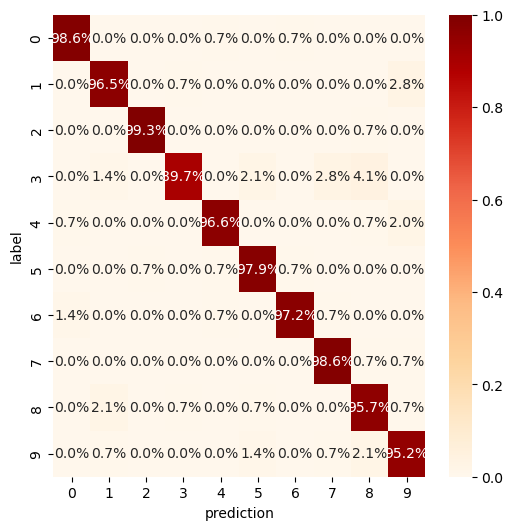

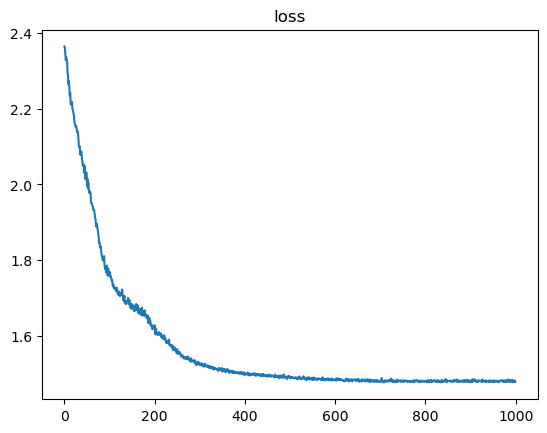

val_loss


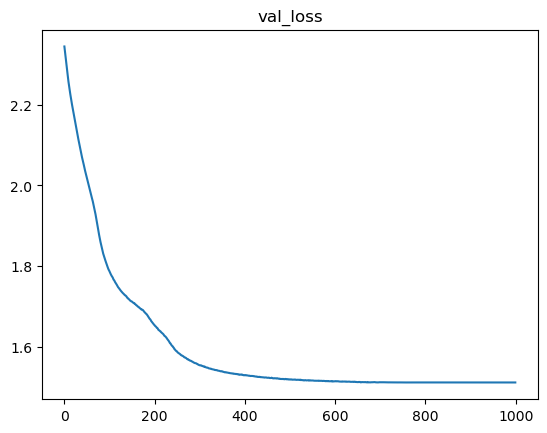

Finished


In [13]:
'''
Main
'''

from sklearn.datasets import load_digits

import torch
torch.cuda.empty_cache()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json
import os

set_seed_torch(42)

train_logdir = './'

data_split = [0.7, 0.1, 0.2]

class TrainerConfig:
    device = 'cpu' # 'cpu' or 'gpu'
    max_epochs = 1000
    batch_size = 1000 #70000 #256
    ini_lr = 5e-4 # initial learning rate
    fin_lr = 1e-6 # final learning rate, if using LinearLR
    gamma = 0.996 # multiplicative factor, if using ExponentialLR
    decayfactor = 0.5 # if using ReduceLROnPlateau
    # patience = 10 # if using ReduceLROnPlateau, not implemented
    betas = (0.9, 0.99)
    eps = 1e-8
    grad_norm_clip = 1.0
    weight_decay = 1e-10
    epoch_save_freq = 0 # set to 0 to only save at the end of the last epoch
    epoch_save_name = train_logdir+'FCNN_'
    num_workers = 0 # for DataLoader, only zero works
    progress_bar = False # whether to show a progress bar
    model_shape = [20]
    dropout = None
    dropout_on_last_layer = False
    

    
# ----------------------------------------------------------------------------

mnist = load_digits()
x = np.array(mnist.data)
y = to_dense(np.array(mnist.target))

assert np.allclose(np.sum(data_split), 1.)
split_idx = np.array(data_split)*len(x)
split_idx = split_idx.astype('int')

# ----------------------------------------------------------------------------

train_set = Dataset(x[:split_idx[0]], y[:split_idx[0]])
val_set = Dataset(x[split_idx[0]:split_idx[-1]], y[split_idx[0]:split_idx[-1]])
test_set = Dataset(x[split_idx[-1]:], y[split_idx[-1]:])

model = FCNN(train_set.x.shape[1], train_set.y.shape[1], TrainerConfig.model_shape 
             )

trainer = Trainer(model, TrainerConfig, train_set, test_set)

log = trainer.train()

test_result = trainer.test()

for key in log.keys():
    plt.figure()
    plt.title(str(key))
    print(key) # in case plt.title does not work
    plt.plot(log[key])
    plt.show()
    
print('Finished')

### Conclusion:

In this project we attempted 4 different approaches to classify sklearn-MNIST dataset.

In general, the supervised approach performs better than unsupervised ones, as the lack of true label greatly hidders the models' abilities in correctly classifying the input images. Although this problem can be mitigated by further encoding other prior information into our training-prediction pipeline, it is beyond the scope of this project.